# План работы

1. Постановка задачи
2. Получение данных
3. Предобработка данных
4. Исследовательский анализ данных
5. Подготовка прототипа решения
6. Доработка решения
7. Оформление результатов
8. Проверка реальностью
9. Вывод

## Подготовка данных

<div style="border:solid blue 2px; padding: 20px">

Импортируем библиотеки
</div>

In [1]:
#pip install sweetviz

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

<div style="border:solid blue 2px; padding: 20px">
    
Методом `read_csv()` прочитаем файлы и сохраним в переменные:
    
</div>

In [3]:
# чтение файла с данными и сохранение в df
# метод try-except поможет загрузить данные локально или глобально
try:
    df1 = pd.read_csv('C:/Users/contract.csv')  # Локальный путь
    df2 = pd.read_csv('C:/Users/personal.csv')
    df3 = pd.read_csv('C:/Users/internet.csv')
    df4 = pd.read_csv('C:/Users/phone.csv')
except:
    df1 = pd.read_csv('/datasets/final_provider/contract.csv')  # Серверный путь
    df2 = pd.read_csv('/datasets/final_provider/personal.csv')
    df3 = pd.read_csv('/datasets/final_provider/internet.csv')
    df4 = pd.read_csv('/datasets/final_provider/phone.csv')

<div style="border:solid blue 2px; padding: 20px">
    
`head()` выводим на экран первые пять строк таблицы:
    </div>

In [4]:
# получение первых 5 строк таблицы contract
df1.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [5]:
# получение первых 5 строк таблицы personal
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
# получение первых 5 строк таблицы internet
df3.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [7]:
# получение первых 5 строк таблицы phone
df4.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<div style="border:solid blue 2px; padding: 20px">
    

`merge(how=outer)` объединим все таблицы  в одну `df` чтобы не потерять ни одного пользователя
    
</div> 

In [8]:
# объединение таблиц в одну df по customerID
df = df1.merge(df2, how='outer', on='customerID').merge(df3, how='outer', on='customerID').merge(df4, how='outer', on='customerID')

In [9]:
# получение первых 5 строк таблицы df
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


<div style="border:solid blue 2px; padding: 20px">
    
`info()` получим общую информацию о таблице:
    </div>

In [10]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


## Вывод

<div style="border:solid blue 2px; padding: 20px">
    
**Оценка полученных данных**

Наблюдения, представленные в таблице описываются категориальными и количественными значениями.
 
    
**Категориальные признаки**

    
    
* `customerid` — идентификатор пользователя  
* `begindate` — начальная дата договора    
* `enddate` — конечная дата договора
* `type` — срок действия договора
* `paperlessbilling` — метод выставление счёта 
* `paymentmethod` — метод оплаты клиента
* `gender` — пол
* `seniorcitizen` — статус пожилого пользователя
* `partner` — семейное положение   
* `dependents` — наличие детей
* `internetservice` — тип кабельного подключения
* `onlinesecurity` — наличие услуги блокировки небезопасных сайтов
* `onlinebackup` — наличие услуги облачного хранилища файлов для резервного копирования данных   
* `deviceprotection` — наличие услуги антивируса
* `techsupport` — наличие услуги выделенной линии технической поддержки   
* `streamingtv` — наличие услуги стримингового телевидения
* `streamingmovies` — наличие услуги каталог фильмов
* `multiplelines` — наличие услуги многоканальной телефонии

    
    
**Количественные признаки**    
    
    
    
* `monthlycharges` — сумма ежемесячного платежа
* `totalcharges` — общая сумма платежей
   
    
    
Данные можно исследовать для прогнозирования отток клиентов:
    
Данные содержат проблемы (ошибки), которые могут привести написанный алгоритм работы к искаженным результатам.
    
Проведём предобработку данных на дубликаты, пропуски, выбросы.
    

</div>

## Предобработка данных

<div style="border:solid blue 2px; padding: 20px">
    
Приведём названия столбцов к нижнему регистру `snake_case`
    
</div> 

In [11]:
# названия столбцов к нижему регистру
df.columns = df.columns.str.lower()
df.columns

Index(['customerid', 'begindate', 'enddate', 'type', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'gender',
       'seniorcitizen', 'partner', 'dependents', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'multiplelines'],
      dtype='object')

<div style="border:solid blue 2px; padding: 20px">
    
Методом `duplicated()` проверим данные на наличие дубликатов и посчитаем их `sum()`
    
</div>

In [12]:
# подсчет явных дубликатов
print('Всего строк дубликатов: ',df.duplicated().sum())

Всего строк дубликатов:  0


<div style="border:solid blue 2px; padding: 20px">
    
Проведём предобработку данных на пропуски

    
</div> 

In [13]:
# получение пропусков
df.isna().sum().sort_values(ascending=False)

streamingmovies     1526
streamingtv         1526
techsupport         1526
deviceprotection    1526
onlinebackup        1526
onlinesecurity      1526
internetservice     1526
multiplelines        682
begindate              0
dependents             0
customerid             0
seniorcitizen          0
gender                 0
totalcharges           0
monthlycharges         0
paymentmethod          0
paperlessbilling       0
type                   0
enddate                0
partner                0
dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    
Заменим пропуски в категориальных признаках на `unknown`
    
</div>

In [14]:
# замена пропусков
df = df.fillna(value='unknown')

In [15]:
# получение пропусков
df.isna().sum()

customerid          0
begindate           0
enddate             0
type                0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
gender              0
seniorcitizen       0
partner             0
dependents          0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
multiplelines       0
dtype: int64

<div style="border:solid blue 2px; padding: 20px">
    

Заменим типы данных в следующих признаках:
    
`df['totalcharges']` `object` на `float64`    
    
`df['enddate']` `object` на `datatime`
    
    
</div> 

In [16]:
# получение информации по типам данных в df
df.dtypes

customerid           object
begindate            object
enddate              object
type                 object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
gender               object
seniorcitizen         int64
partner              object
dependents           object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
multiplelines        object
dtype: object

<div style="border:solid blue 2px; padding: 20px">
    
Методом `unique()` получаем уникальные значения всех признаков
    </div>

In [17]:
# просмотр уникальных customerid
df['totalcharges'].sort_values().unique()

array([' ', '100.2', '100.25', ..., '999.45', '999.8', '999.9'],
      dtype=object)

In [18]:
# получение строк с пробелами в totalcharges
df.query('totalcharges == " "')

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,unknown
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,,Male,0,No,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Yes
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,unknown
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,Yes
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,,Female,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,,Male,0,Yes,Yes,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


<div style="border:solid blue 2px; padding: 20px">
    
Пользователи с начальной датой договора `2020-02-01` в признаке `totalcharges` 
    
пока ещё не имеют данных по общей сумме платежей, поэтому заменим пробелы на `0`
    

</div>

In [19]:
# замена значения
df.loc[df['totalcharges'] == " ", 'totalcharges'] = '0'

<div style="border:solid blue 2px; padding: 20px">
    
Методом `astype()` заменим тип данных в `totalcharges` на вещественные `float`

</div> 

In [20]:
# замена на вещественные тип данных
df['totalcharges'] = df['totalcharges'].astype('float')

<div style="border:solid blue 2px; padding: 20px">
    
Рассмотрим `enddate` на интервал наблюдений

</div>

In [21]:
# просмотр уникальных enddate
df['enddate'].sort_values().unique()

array(['2019-10-01 00:00:00', '2019-11-01 00:00:00',
       '2019-12-01 00:00:00', '2020-01-01 00:00:00', 'No'], dtype=object)

<div style="border:solid blue 2px; padding: 20px">
    
Конечная дата договора `enddate` соответствует началу календарного месяца
    
Наблюдения в интервале между `2019-10-01` и  `2020-01-01` датами
    
Уникальные `No` - соответствует `активности` пользователя
    

    

</div>

In [22]:
# получение строк с активными пользователями
df.query('enddate == "No"')

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,gender,seniorcitizen,partner,dependents,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,multiplelines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,unknown
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,unknown
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,Female,0,No,No,DSL,Yes,No,No,No,No,No,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,2569-WGERO,2014-02-01,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,Female,0,No,No,unknown,unknown,unknown,unknown,unknown,unknown,unknown,No
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.50,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.90,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,unknown


<div style="border:solid blue 2px; padding: 20px">
    
Получим признак `active` по условию что `enddate != "No"`
    
</div>

In [23]:
# получение признака active по условию
df['active'] = (df['enddate'] != 'No')*1

<div style="border:solid blue 2px; padding: 20px">
    
Получили  **категориальный целевой признак** - `active` - задача классификации
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Посмотрим как часто в целевом признаке встречается класс `0` и `1`
</div>

0    0.73463
1    0.26537
Name: active, dtype: float64


<AxesSubplot:>

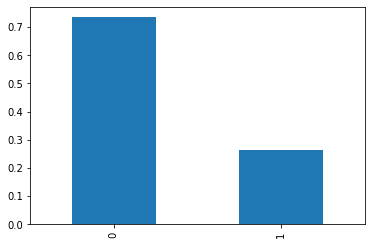

In [24]:
# вывод доли активых пользователей
class_frequency = df['active'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

<div style="border:solid blue 2px; padding: 20px">
 
    
Около `26%` значений по факту ухода клиента. 
    
Баланс классов `0/1` соостветсвует соотношению `4/1`    

    
    
</div>

<div style="border:solid blue 2px; padding: 20px">
    
Заменим в `enddate` значения `No` на  `2020-02-01`
</div>

In [25]:
#замена значений в enddate
df.loc[df['enddate'] == 'No', 'enddate'] = '2020-02-01'

<div style="border:solid blue 2px; padding: 20px">
    
Методом `to_datetime()` заменим тип данных в `enddate` на вещественные `datetime`

</div>

In [26]:
# приведение в типу datetime
df['enddate'] = pd.to_datetime(df['enddate'], format = '%Y-%m-%d')

## Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
**Оценка предобработки данных**
    
    
Привели названия столбцов к нижнему регистру `snake_case`
    
Проверили данные на наличие дубликатов: отсутствуют
    
Полученные при объединении таблиц пропуски заменим по умолчанию на `unknown`
    
Заменили типы данных в следующих признаках: `totalcharges` `begindate` `enddate`
    
Получили  **категориальный целевой признак** - `active` - задача классификации     
    
Баланс классов `0/1` соостветсвует соотношению `4/1`. Около `26%` наблюдений по факту ухода клиента.  
    
    
    
**Проблемы и их возможные причины появления:**
    
    
    
Пропуски в **Категориальных** переменных.
    
- Пропуски `NaN` появились в результате объединения таблиц
    
  Заменили на значение `unknown`
    
    
Уникальные значения в **Количественных** переменных.  
    
    
- Артефакт обнаружены пробелы в `totalcharges` соответствующие новому контракту, 
    
  Причина появления технологическая.
    
  Возможно при оформлении контракта с пользователем внутренняя программа заносит
    
  соответствующую информацию по общим платежам по истечению месяца после первой оплаты в `monthlycharges`.
    
   `Проблемы с преобразованием данных о фиксации общих платежей` - вопрос к разработчикам
    


    
    
**ОТСУТСТВИЕ ИЗНАЧАЛЬНО ПРОПУЩЕННЫХ ЗНАЧЕНИЙ ОБЛЕГЧАЕТ ПРЕДОБРАБОТКУ И АНАЛИЗ ДАННЫХ**
    

    
    
</div>

## Исследовательский анализ данных

<div style="border:solid blue 2px; padding: 20px">
    
 
`Sweetviz` применим для исследовательского анализа данных
    
- `show_html` для просмотра в браузере
    
- `show_notebook()` в нотбуке
    
    
</div> 

In [27]:
#report_df = sv.analyze(df)
#report_df.show_notebook()

In [28]:
#report_df.show_html(filepath='SWEETVIZ_REPORT.html',open_browser=True,layout='widescreen',scale=None)

<div style="border:solid blue 2px; padding: 20px">

    
Рассмотрим зависимость между факторами модели
    
* Association (закономерности и связи между признаками)

 `Квадраты` - это категориальные ассоциации (коэффициент корреляции) от 0 до 1.   
    
 `Круги` - это симметричные числовые корреляции (Пирсона) от -1 до 1. 
    
  Тривиальная диагональ намеренно оставлена пустой для ясности
    
**Числовые корреляции**
    
- `0.65` между `monthlycharges` и  `totalcharges`: в модель включаем оба фактора.
    
**Категориальные корреляции**   
    
    
- `customerid` исключим: зависимости с другими признаками не показывает.
    
    
- `begindate` оставляем: `0.16` с `active` , `0.30` с `type` , `0.17` с `enddate` ,  `0.12` с `partner`.
    
    
- `enddate` исключим: из данных, потому что это на нём получили целевой признак `active`.
    
    
- `type` оставляем: `0.17` с `active` , `0.11` с `techsupport.
    
 
- `paperlessbilling` оставляем: `0.03` с `active` ,  `0.07` с `internetservice`.
    
    
- `paymentmethod` оставляем: `0.08` с `active` , `0.1` с `internetservice`.
    
    
- `gender` исключим: зависимости с другими признаками не показывает.
    
    
- `seniorcitizen` оставляем: `0.02` с `active`.  
    
    
- `partner` оставляем: `0.02` с `active`.
    
    
- `dependents` оставляем: `0.03` с `active` , `0.16` с `partner`.
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    

В данных представленны две важные характеристики пользователя `monthlycharges` — сумма ежемесячного платежа,
    
которая по сути в себе уже заложила информацию о подключённых услугах в `internet` и `phone`:

- internetservice `0.91`
- streamingtv `0.84`
- streamingmovies `0.84`
- deviceprotection `0.79`
- onlinebackup `0.78`
- techsupport `0.77`
- onlinesecurity `0.76`
- multiplelines `0.50`
- paymentmethod `0.40`
- paperlessbilling `0.35`
- begindate `0.30`
- seniorcitizen `0.22`
- enddate `0.19`
- active `0.19`

    
и `totalcharges` — общая сумма платежа, которая отражает `длительность жизни пользователя`
    
- begindate `0.83`
- deviceprotection `0.56`
- streamingmovies `0.55`
- onlinebackup `0.55`
- streamingtv `0.54`
- techsupport `0.50`
- onlinesecurity `0.48`
- multiplelines `0.47`
- type `0.46`
- internetservice `0.43`
- paymentmethod `0.35`
- partner `0.32`
- enddate `0.20`
- active `0.20`
    

 
Поэтому решили оставить признаки `monthlycharges` и `totalcharges` как основные и
    
исключить второстепенные из модели:
  
`'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'multiplelines'`

</div>

<div style="border:solid blue 2px; padding: 20px">

    
Рассмотрим зависимость между числовыми факторами
    

суммой ежемесячных платежей `monthlycharges` и общими платежами `totalcharges`
 
    
Получим таблицу с коэффициентами корреляции методом `corr()`
    
    
Потроим диаграммы рассеяния `.plotting.scatter_matrix`
    


</div> 

In [29]:
# вывод строк для определения зависимости
df_correlation = df.loc[:,['monthlycharges','totalcharges']]
df_correlation.head()

,monthlycharges,totalcharges
0,29.85,29.85
1,56.95,1889.50
2,53.85,108.15
3,42.30,1840.75
4,70.70,151.65


In [30]:
# вывод матрицы корреляции
df_correlation.corr()

,monthlycharges,totalcharges
monthlycharges,1.000000,0.651174
totalcharges,0.651174,1.000000


array([[<AxesSubplot:xlabel='monthlycharges', ylabel='monthlycharges'>,
        <AxesSubplot:xlabel='totalcharges', ylabel='monthlycharges'>],
       [<AxesSubplot:xlabel='monthlycharges', ylabel='totalcharges'>,
        <AxesSubplot:xlabel='totalcharges', ylabel='totalcharges'>]],
      dtype=object)

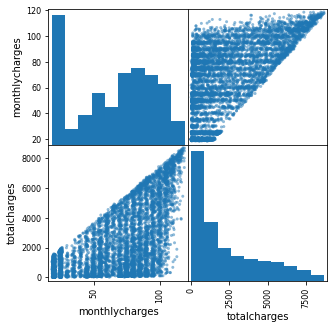

In [31]:
# построение диаграмм рассеяния
pd.plotting.scatter_matrix(df_correlation, figsize=(5, 5))

<div style="border:solid blue 2px; padding: 20px">

    
Наличие умеренной положительной корреляции `0.65` между
    
суммой ежемесячных платежей `monthlycharges` и общими платежами `totalcharges` 
    
Принимаем решение включить в модель оба фактора
    


</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Сравним распределения ежемесячных платежей `monthlycharges`:
    
- для всех пользователей
    
- не активных пользователей

</div>

In [32]:
# описание данных по не активным пользователям
df.query('active == 1')['monthlycharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: monthlycharges, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
Статистика `monthlycharges` по не активным пользователям:
    
- среднее `74.44`
    
- минимальное `18.85`
    
- максимальное `118.35`
    
- медиана (50-й процентиль или Q2 квартиль) `74.44`
    
- 25-й процентиль или Q1 квартиль `56.15`
    
- 75-й процентиль или Q3 квартиль `94.20`

</div>

<AxesSubplot:title={'center':'гистограмма по неактивным пользователям'}, ylabel='Frequency'>

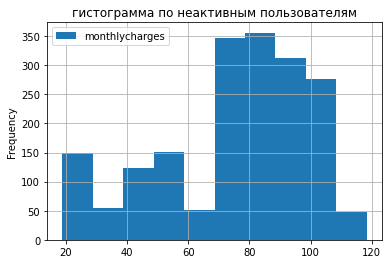

In [33]:
# построение гистограммы по не активным пользователям
df.query('active == 1')['monthlycharges'].plot.hist(bins=10, grid=True, legend=True, title='гистограмма по неактивным пользователям')

In [34]:
# описание данных по всем пользователям
df['monthlycharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthlycharges, dtype: float64

<div style="border:solid blue 2px; padding: 20px">
    
Статистика `monthlycharges` по всем пользователям:
    
- среднее `64.76`
    
- минимальное `18.25`
    
- максимальное `118.75`
    
- медиана (50-й процентиль или Q2 квартиль) `70.35`
    
- 25-й процентиль или Q1 квартиль `35.50`
    
- 75-й процентиль или Q3 квартиль `89.85`

</div>

<AxesSubplot:title={'center':'гистограмма по всем пользователям'}, ylabel='Frequency'>

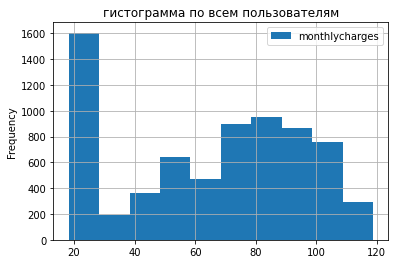

In [35]:
# построение гистограммы по всем пользователям
df['monthlycharges'].plot.hist(bins=10, grid=True, legend=True, title='гистограмма по всем пользователям')

<div style="border:solid blue 2px; padding: 20px">
    
Сгруппируем клиентов по `monthlycharges` на десять диапазонов платежей
    
</div>

In [36]:
# получение десяти групп по ежемесячным платежам
pd.cut(df['monthlycharges'], 10)

0        (28.3, 38.35]
1        (48.4, 58.45]
2        (48.4, 58.45]
3        (38.35, 48.4]
4        (68.5, 78.55]
             ...      
7038     (78.55, 88.6]
7039    (98.65, 108.7]
7040     (28.3, 38.35]
7041     (68.5, 78.55]
7042    (98.65, 108.7]
Name: monthlycharges, Length: 7043, dtype: category
Categories (10, interval[float64]): [(18.15, 28.3] < (28.3, 38.35] < (38.35, 48.4] < (48.4, 58.45] ... (78.55, 88.6] < (88.6, 98.65] < (98.65, 108.7] < (108.7, 118.75]]

<div style="border:solid blue 2px; padding: 20px">
    
Сравним поведение клиентов по `monthlycharges` между не активными и всеми пользователями

</div>

In [37]:
# сгруппируем данные по monthlycharges и посмортим на их активность
t = df.groupby(pd.cut(df['monthlycharges'], 10))['active'].agg(['count','sum']).reset_index()
t['mean'] = t['sum']/t['count']
t

,monthlycharges,count,sum,mean
0,"(18.15, 28.3]",1606,148,0.092154
1,"(28.3, 38.35]",191,57,0.298429
2,"(38.35, 48.4]",365,119,0.326027
3,"(48.4, 58.45]",640,152,0.237500
4,"(58.45, 68.5]",474,54,0.113924
5,"(68.5, 78.55]",893,349,0.390817
6,"(78.55, 88.6]",953,355,0.372508
7,"(88.6, 98.65]",873,320,0.366552
8,"(98.65, 108.7]",754,272,0.360743
9,"(108.7, 118.75]",294,43,0.146259


<div style="border:solid blue 2px; padding: 20px">
    
Платежи не активных пользователей в основном находились в:
    
- `28.3, 38.35` это 29% от всех пользователей в этом диапазоне
    
- `38.35, 48.4` это 32% от всех пользователей в этом диапазоне
    
- `48.4, 58.45` это 23% от всех пользователей в этом диапазоне    

- `68.5, 78.55` это 39% от всех пользователей в этом диапазоне
    
- `78.55, 88.6` это 37% от всех пользователей в этом диапазоне
    
- `88.6, 98.65` это 36% от всех пользователей в этом диапазоне
    
- `98.65, 108.7` это 36% от всех пользователей в этом диапазоне
    


</div>

<div style="border:solid blue 2px; padding: 20px">
    
Диапазон `18.15, 28.3` по `monthlycharges` составляет наиболее часто встречающиеся пользователей `1606`
   
В нём всего 9% не активных ползователей

</div>

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `boxplot()` поcтроим диаграмму размаха `monthlycharges` по типам контрактов
    
    
</div> 

Text(0, 0.5, 'Сумма ежемесячного платежа')

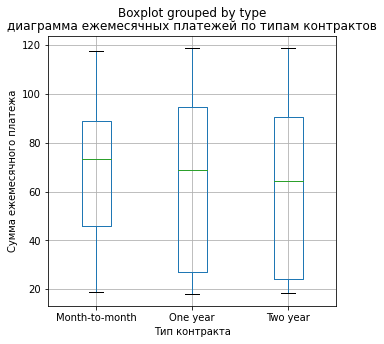

In [38]:
# диаграмма размаха для monthlycharges по типам контрактов
df.boxplot(column=['monthlycharges'], by='type', figsize=(5,5), grid=True)
plt.title('диаграмма ежемесячных платежей по типам контрактов')
plt.xlabel('Тип контракта')  
plt.ylabel('Сумма ежемесячного платежа')

<div style="border:solid blue 2px; padding: 20px">
    
  
`monthlycharges` по типам контрактов находятся в диапазоне `20 - 120` в зависимости от подключённых услуг
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
 
Методом `boxplot()` поcтроим диаграмму размаха `monthlycharges` по типам контрактов
    
    
</div> 

Text(0, 0.5, 'Сумма общего платежа')

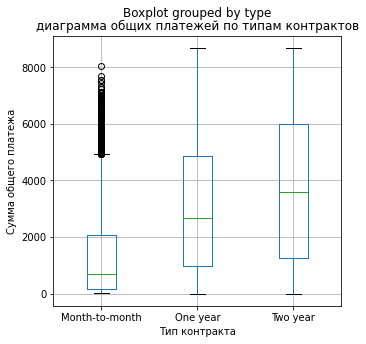

In [39]:
# диаграмма размаха totalcharges по типам контрактов
df.boxplot(column=['totalcharges'], by='type', figsize=(5,5), grid=True)
plt.title('диаграмма общих платежей по типам контрактов')
plt.xlabel('Тип контракта');    
plt.ylabel('Сумма общего платежа')

In [40]:
outliers=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > upper_tail or i < lower_tail:
            outliers.append(i)
    print("Выбросы:",outliers)
iqr_outliers(df.query('type == "Month-to-month"')['totalcharges'])

Выбросы: [5036.3, 5450.7, 7107.0, 5238.9, 6519.75, 6126.15, 5624.85, 5138.1, 6603.0, 7007.6, 5070.4, 6396.45, 6300.15, 5916.95, 5029.05, 6786.4, 6985.65, 5589.3, 6751.35, 5774.55, 6215.35, 5017.9, 5645.8, 5580.8, 4997.5, 5475.9, 6127.6, 5124.55, 7133.25, 5315.1, 6373.1, 5985.75, 7227.45, 4993.4, 6081.4, 7002.95, 6710.5, 5341.8, 7082.45, 5125.5, 6669.05, 5044.8, 5832.0, 6669.45, 5931.0, 4931.8, 5124.6, 5118.95, 5099.15, 5940.85, 5885.4, 5869.4, 4946.05, 4964.7, 5594.0, 7554.05, 5893.95, 5427.05, 7111.3, 6690.75, 6941.2, 6822.15, 5029.2, 5068.05, 6223.3, 5969.95, 5149.5, 5574.75, 5742.9, 5935.1, 5611.7, 6281.45, 6713.2, 6780.1, 5294.6, 5135.35, 4959.6, 6017.9, 6841.05, 6010.05, 7101.5, 6236.75, 5038.15, 6283.3, 6143.15, 5073.1, 5278.15, 5913.95, 5586.45, 5327.25, 5549.4, 6118.95, 5841.35, 5688.45, 6019.35, 4949.1, 5497.05, 5921.35, 6572.85, 6936.85, 5817.7, 8061.5, 5405.8, 7132.15, 5647.95, 5127.95, 6079.0, 5839.3, 5683.6, 5780.7, 5812.6, 6851.65, 6171.2, 5623.7, 5581.05, 5676.65, 5496.9

In [41]:
# получение доли в выбросах всех пользователей по типу Month-to-month
o = df.query('type == "Month-to-month" and totalcharges ==@outliers ').groupby('active')['active'].agg(['count'])
o['mean'] = o['count']/df.query('type == "Month-to-month" and totalcharges ==@outliers ').shape[0]
o

,count,mean
active,,
0,143,0.715
1,57,0.285


<AxesSubplot:xlabel='active'>

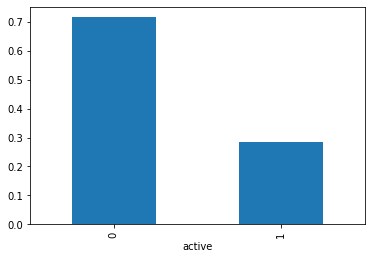

In [42]:
# график долей в выбросах всех пользователей по типу Month-to-month
o['mean'].plot(kind='bar')

<div style="border:solid blue 2px; padding: 20px">
    
В выбросах всех пользователей по типу `Month-to-month` в `totalcharges` активных `71%` и не активных `29%`

</div>

<div style="border:solid blue 2px; padding: 20px">
    
  
`totalcharges` по типам контрактов `One/Two year `находятся в диапазоне `20 - 8500` 
    
 по типам контрактов `Month-to-month `находятся в диапазоне `20 - 5000` большим количством выбросов
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Для не активных и всех пользователей долю в `multiplelines`

</div>

In [43]:
# получение доли всех пользователей multiplelines
g = df.groupby('multiplelines')['multiplelines'].agg(['count'])
g['mean'] = g['count']/df.shape[0]
g

,count,mean
multiplelines,,
No,3390,0.481329
Yes,2971,0.421837
unknown,682,0.096834


<AxesSubplot:xlabel='multiplelines'>

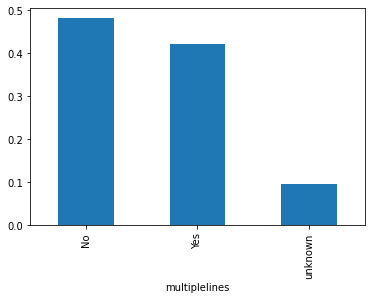

In [44]:
# график долей всех пользователей multiplelines
g['mean'].plot(kind='bar')

In [45]:
# получение доли не активных пользователей multiplelines
b = df.query('active == 1').groupby('multiplelines')['multiplelines'].agg(['count'])
b['mean'] = b['count']/df.query('active == 1').shape[0]
b

,count,mean
multiplelines,,
No,849,0.454254
Yes,850,0.454789
unknown,170,0.090958


<AxesSubplot:xlabel='multiplelines'>

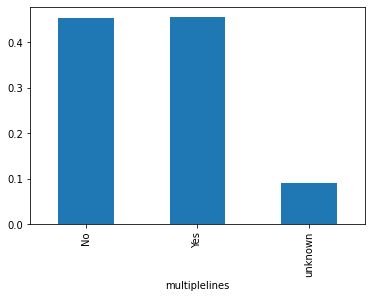

In [46]:
# график долей всех пользователей multiplelines
b['mean'].plot(kind='bar')

<div style="border:solid blue 2px; padding: 20px">
    
Для не активных пользователей доля в `multiplelines` `45% - Yes` `45% - No` `10% - unknown`
    
и всех пользователей доля в `multiplelines` `42% - Yes` `48% - No` `10% - unknown`

</div>

<div style="border:solid blue 2px; padding: 20px">
    
Для не активных и всех пользователей долю в `internetservice`

</div>

In [47]:
# получение доли всех пользователей internetservice
m = df.groupby('internetservice')['internetservice'].agg(['count'])
m['mean'] = m['count']/df.shape[0]
m

,count,mean
internetservice,,
DSL,2421,0.343746
Fiber optic,3096,0.439585
unknown,1526,0.216669


<AxesSubplot:xlabel='internetservice'>

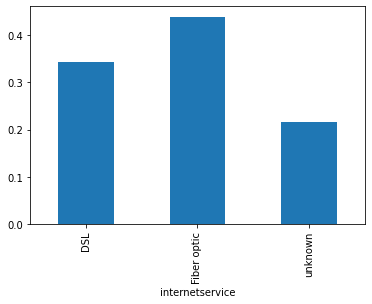

In [48]:
# график долей всех пользователей internetservice
m['mean'].plot(kind='bar')

In [49]:
# получение доли не активных пользователей internetservice
n = df.query('active == 1').groupby('internetservice')['internetservice'].agg(['count'])
n['mean'] = n['count']/df.query('active == 1').shape[0]
n

,count,mean
internetservice,,
DSL,459,0.245586
Fiber optic,1297,0.693954
unknown,113,0.060460


<AxesSubplot:xlabel='internetservice'>

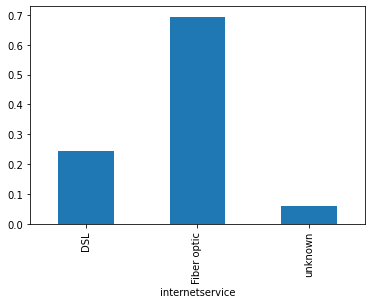

In [50]:
# график долей не активных пользователей internetservice
n['mean'].plot(kind='bar')

<div style="border:solid blue 2px; padding: 20px">
    
Для не активных пользователей доля в `internetservice` `25% - DSL` `69% - Fiber optic` `6% - unknown`
    
и всех пользователей доля в `internetservice` `34% - DSL` `44% - Fiber optic` `22% - unknown`

</div>

## Вывод

<div style="border:solid blue 2px; padding: 20px">
    
    
**Оценка исследовательского анализа данных**
    
    
- `Sweetviz` применили для предварительного рассмотрения feature importance 
    
    
- Выявили зависимости и связи в категориальных и количественных признаках
    
    
- Приняли решение исключить второстепенные признаки:
  
`'internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'multiplelines'`
    
    
- Приняли решение исключить признаки не показывающие зависимости: `'customerid', 'gender'`
    
    
- Приняли решение исключить признак, на основе которого получен целевой признак: `'enddate'`
    
    
- Сравнили распределения ежемесячных платежей `monthlycharges`: для всех и не активных пользователей
    
  Выявили диапазон ежемесячных платежей `70 - 110` соответствующий для не активных пользователей
    
    
- Обнаружили выбросы в `totalcharges` по типу `Month-to-month`,где доля активных `71%`, не активных `29%`
    
    
- Получили доли пользователей телефонной связи `multiplelines`:
    
  для всех пользователей `42% - Yes` `48% - No` `10% - unknown`
    
  для неактивных пользователей `45% - Yes` `45% - No` `10% - unknown`
    
    
- Получили доли интернет пользователей `internetservice`:
    
  для всех пользователей `34% - DSL` `44% - Fiber optic` `22% - unknown`
    
  для неактивных пользователей `25% - DSL` `69% - Fiber optic` `6% - unknown`
    
Далее подготовка прототипа решения - рабочего варианта решения задачи
    

</div>

## Построение модели

<div style="border:solid blue 2px; padding: 20px">
    
Методом `dt.days` получим длительность контракта в днях `duration_days`

</div> 

In [51]:
# получение столбца с числом дней длительности контракта
df['duration_days'] = (pd.to_datetime(df['enddate'], errors='coerce') - pd.to_datetime(df['begindate'], errors='coerce')).dt.days

<div style="border:solid blue 2px; padding: 20px">
    
 
`drop()` удалим столбцы на основе исследовательского анализа
    
    
</div> 

In [52]:
# удаление столбцов
df = df.drop(['customerid','begindate','enddate','gender','internetservice','onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport','streamingtv', 'streamingmovies', 'multiplelines'],axis = 1)

In [53]:
# получение первых 5 строк таблицы df
df.head()

,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,seniorcitizen,partner,dependents,active,duration_days
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,Yes,No,0,31
1,One year,No,Mailed check,56.95,1889.50,0,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,108.15,0,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,No,No,0,1371
4,Month-to-month,Yes,Electronic check,70.70,151.65,0,No,No,1,61


In [54]:
# получение информации по типам данных в df
df.dtypes

type                 object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
seniorcitizen         int64
partner              object
dependents           object
active                int64
duration_days         int64
dtype: object

In [55]:
# названия столбцов
df.columns

Index(['type', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'seniorcitizen', 'partner', 'dependents', 'active',
       'duration_days'],
      dtype='object')

<div style="border:solid blue 2px; padding: 20px">
    
Методом `astype()` заменим тип данных в `totalcharges` `monthlycharges` на целый `int`

</div> 

In [56]:
# замена вещественных типов на целые
df['totalcharges'] = df['totalcharges'].astype(np.int)
df['monthlycharges'] = df['monthlycharges'].astype(np.int)

<div style="border:solid blue 2px; padding: 20px">
    
 
`train_test_split()` разделим исходные данные на обучающую, валидационную и тестовую выборки
    
    
</div> 

In [57]:
# получение обучающей выборки
df_train, df_part = train_test_split(df, test_size=0.4,shuffle=True, random_state=42)
print('Объектов обучающей выборки', len(df_train) / len(df))

Объектов обучающей выборки 0.5998864120403238


In [58]:
# получение валидационной и тестовой выборки
df_valid, df_test = train_test_split(df_part, test_size=0.5, random_state=42)
print('Объектов валидационной выборки', len(df_valid) / len(df))
print('Объектов тестовой выборки', len(df_test) / len(df))

Объектов валидационной выборки 0.20005679397983814
Объектов тестовой выборки 0.20005679397983814


<div style="border:solid blue 2px; padding: 20px">
    
 
`select_dtypes()` выделим категориальные признаки
    
    
</div> 

In [59]:
# категориальные признаки
cols_cat = df.select_dtypes(exclude='int64').columns
cat_features = list(cols_cat)
cat_features

['type', 'paperlessbilling', 'paymentmethod', 'partner', 'dependents']

<div style="border:solid blue 2px; padding: 20px">
    
 
Признаки сохраним в отдельных переменных 
    
    
- X - `features`
    
    
- y - `target` - целевой признак
    
    
</div> 

In [60]:
# названия столбцов
df.columns

Index(['type', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'seniorcitizen', 'partner', 'dependents', 'active',
       'duration_days'],
      dtype='object')

In [61]:
# сохранение признаков в отдельных переменных
X = ['duration_days', 'type', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'seniorcitizen', 'partner',
       'dependents']
y = ['active']

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем качество на модели — бустинг для категориальных признаков.

    
    
</div> 

In [62]:
# параметры модели
params = {'cat_features':cat_features,
          'eval_metric':'AUC',
          'random_state': 42,
          'learning_rate':0.1,
          'verbose':100}

In [63]:
# передаём пареметры модели CatBoostClassifier
cbc = CatBoostClassifier(**params)

In [64]:
# обучение модели CatBoostClassifier
cbc.fit(df_train[X], df_train[y], eval_set=(df_valid[X], df_valid[y]))

0:	test: 0.8363971	best: 0.8363971 (0)	total: 53.2ms	remaining: 53.2s
100:	test: 0.8909635	best: 0.8910969 (98)	total: 441ms	remaining: 3.92s
200:	test: 0.9125996	best: 0.9128152 (195)	total: 894ms	remaining: 3.55s
300:	test: 0.9238270	best: 0.9238270 (300)	total: 1.35s	remaining: 3.15s
400:	test: 0.9297325	best: 0.9302701 (387)	total: 1.81s	remaining: 2.7s
500:	test: 0.9325884	best: 0.9325884 (500)	total: 2.27s	remaining: 2.26s
600:	test: 0.9336097	best: 0.9336097 (600)	total: 2.72s	remaining: 1.8s
700:	test: 0.9349671	best: 0.9352827 (699)	total: 3.18s	remaining: 1.35s
800:	test: 0.9355598	best: 0.9357984 (791)	total: 3.63s	remaining: 902ms
900:	test: 0.9346617	best: 0.9357984 (791)	total: 4.13s	remaining: 454ms
999:	test: 0.9351005	best: 0.9357984 (791)	total: 4.65s	remaining: 0us

bestTest = 0.9357984491
bestIteration = 791

Shrink model to first 792 iterations.


AUC-ROC CatBoostClassifier 0.9357984491350156


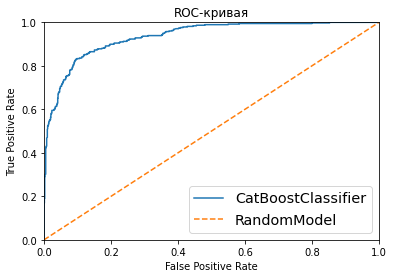

In [65]:
# получение predict_proba и fpr, tpr, thresholds и auc_roc
probabilities_one_valid = cbc.predict_proba(df_valid[X])[:, 1]
fpr, tpr, thresholds = roc_curve(df_valid[y], probabilities_one_valid)
auc_roc = roc_auc_score(df_valid[y], probabilities_one_valid)
print('AUC-ROC CatBoostClassifier',auc_roc)
plt.plot(fpr, tpr, label='CatBoostClassifier')
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right', fontsize='x-large')
plt.title("ROC-кривая")
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
Метрика `AUC-ROC` модели `0.935` на валидационной выборке


    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Подберём оптимальный порог


    
</div> 

In [66]:
# перебор циклом порогов c поиском максимальной f1
result = []
for threshold in tqdm(thresholds):
    predicted_valid = (probabilities_one_valid > threshold) * 1
    result.append((threshold, f1_score(df_valid[y],predicted_valid)))

  0%|          | 0/248 [00:00<?, ?it/s]

In [67]:
# сохранение полученных результатов в data_f1
data_f1 = pd.DataFrame(result,columns=['threshold','f1'])

In [68]:
# вывод неободимого порога по условию 
data_f1[data_f1['f1'] == data_f1['f1'].max()]

,threshold,f1
127,0.339493,0.793409


In [69]:
# сохранение значения порога
threshold = float(data_f1.query('f1 == f1.max()')['threshold'])
threshold

0.33949252543282804

<div style="border:solid blue 2px; padding: 20px">
    
 
Исследуем модель на тестовой выборке — с учётом порога.
    
    
</div> 

In [70]:
# значением метрики качества AUC-ROC
print('метрика AUC-ROC на тестовой выборке', roc_auc_score(df_test[y], cbc.predict_proba(df_test[X])[:, 1]))

метрика AUC-ROC на тестовой выборке 0.9346153446655138


In [71]:
# предсказания на тестовой выборке
predicted_test = (cbc.predict_proba(df_test[X])[:, 1] > threshold) * 1

In [72]:
# значением метрики качества F1
print('метрика F1 на тестовой выборке', f1_score(df_test[y],predicted_test))

метрика F1 на тестовой выборке 0.7764705882352941


<div style="border:solid blue 2px; padding: 20px">
    
Метрика `AUC-ROC` модели `0.935` на тестовой выборке


    
</div> 

## Выводы

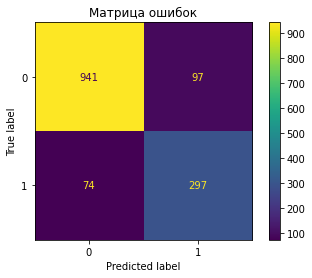

In [73]:
# получение матрицы ошибок
cm = confusion_matrix(df_test[y], predicted_test, labels=cbc.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cbc.classes_)
display.plot()
plt.title('Матрица ошибок')
plt.show()

<div style="border:solid blue 2px; padding: 20px">
    
Метрика `AUC-ROC` на тестовой выборке для полученной модели составляет `0.935`
    
Исходя из идеального показателя `AUC-ROC = 1`, можно оценить модель как `хорошую`.
    
Метрика `F1` на тестовой выборке для полученной модели составляет `0.77`
    
Следовательно с такими показателями метрик `f1-мера` и `AUC-ROC` модель будет выполнять работу.
    
По матрице ошибок можно рекомендовать полученную модель для прогнозирования оттока клиентов.
    
    
</div> 

<div style="border:solid blue 2px; padding: 20px">
    
Рассмотрим важность признаков при построении модели
    
    
</div> 

Text(0, 0.5, 'feature names')

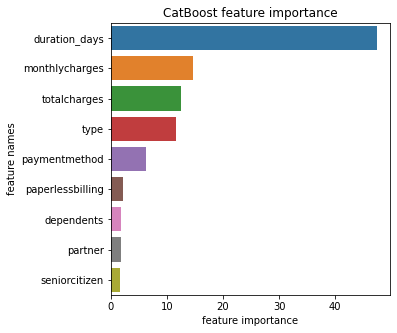

In [74]:
# получение важности признаков для модели CatBoostClassifier
df_fi = pd.DataFrame({'feature_names':df_train[X].columns,'feature_importance':cbc.get_feature_importance()})
df_fi.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(5,5))
sns.barplot(x=df_fi['feature_importance'], y=df_fi['feature_names'])
plt.title('CatBoost feature importance')
plt.xlabel('feature importance')
plt.ylabel('feature names')

In [75]:
# вывод признаков и их важности для обучения модели
df_fi

,feature_names,feature_importance
0,duration_days,47.359529
4,monthlycharges,14.677238
5,totalcharges,12.462448
1,type,11.567920
3,paymentmethod,6.357749
2,paperlessbilling,2.244046
8,dependents,1.901804
7,partner,1.832866
6,seniorcitizen,1.596400


## Отчёт по решению

<div style="border:solid blue 2px; padding: 20px">
    
**Выполнение плана работы по шагам**
    
- Постановка задачи: успех
    
- Получение данных: успех
    
- Предобработка данных: успех
    
Получили дополнительный признак `duration_days` cо значение важности в обучении `47.35`
    
- Исследовательский анализ данных: успех
    
Увидели особенности и закономерности в данных, и дополнительно подготовили информацию для отдела маркетинга.
    
- Подготовка прототипа решения и его доработка: успех
    
Получили рабочую модель с хорошей точностью прогнозирования.
    
- Оформление результатов: успех
    
Для бизнеса представили важность факторов.
    
- Проверка реальностью: успех
       
Получили требуемое значение метрики `AUC-ROC` на тестовой выборке.
    
**Трудности в задаче и пути решения**
    
Выявление закономерностей и связей между признаками: решили применить библиотеку `Sweetviz`,
    
по которой предварительно выбрали важные для обучения модели числовые и категориальные признаки.
    
**Ключевые шаги в решении задачи**
    
Расчитали длительность взаимодействия клиента и банка, которая в итоге оказалась ключевым фактором в модели.
    
**Итоговая модель и её качество**
    
Метрика `AUC-ROC` на тестовой выборке для полученной модели составляет `0.935`    
    
</div> 